# Coffee Sales Prediction

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DatasetForCoffeeSales2.csv')

In [3]:
df.head()

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
0,1/1/2023,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560
1,1/2/2023,49,Abha,coffee beans,Costa Rica,35,17,595,False,0,595
2,1/3/2023,75,Tabuk,coffee beans,Costa Rica,35,19,665,False,0,665
3,1/4/2023,80,Abha,coffee beans,Ethiopian,45,1,45,False,0,45
4,1/5/2023,78,Hail,coffee beans,Colombian,40,46,1840,True,368,1472


In [4]:
df.shape

(730, 11)

In [5]:
df.size

8030

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             730 non-null    object
 1   Customer_ID      730 non-null    int64 
 2   City             730 non-null    object
 3   Category         730 non-null    object
 4   Product          730 non-null    object
 5   Unit Price       730 non-null    int64 
 6   Quantity         730 non-null    int64 
 7   Sales Amount     730 non-null    int64 
 8   Used_Discount    730 non-null    bool  
 9   Discount_Amount  730 non-null    int64 
 10  Final Sales      730 non-null    int64 
dtypes: bool(1), int64(6), object(4)
memory usage: 57.9+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,730.0,51.669863,29.014339,1.0,27.25,52.0,77.0,100.0
Unit Price,730.0,36.794521,4.955104,30.0,35.00,35.0,40.0,45.0
Quantity,730.0,26.080822,14.480971,1.0,14.00,27.0,39.0,49.0
Sales Amount,730.0,959.924658,551.282730,30.0,495.00,960.0,1400.0,2205.0
Discount_Amount,730.0,97.393151,123.401350,0.0,0.00,13.0,192.0,441.0
Final Sales,730.0,862.531507,509.032315,24.0,448.00,840.0,1260.0,2205.0


In [8]:
df.isnull().sum()

Date               0
Customer_ID        0
City               0
Category           0
Product            0
Unit Price         0
Quantity           0
Sales Amount       0
Used_Discount      0
Discount_Amount    0
Final Sales        0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.nunique()

Date               730
Customer_ID        100
City                10
Category             1
Product              5
Unit Price           4
Quantity            49
Sales Amount       149
Used_Discount        2
Discount_Amount    134
Final Sales        243
dtype: int64

In [13]:
df['City'].value_counts()

City
Hail        87
Riyadh      79
Jeddah      77
Mecca       77
Khobar      73
Dammam      72
Medina      71
Buraidah    69
Abha        66
Tabuk       59
Name: count, dtype: int64

In [14]:
df['Product'].value_counts()

Product
Costa Rica    165
Colombian     152
Brazilian     146
Guatemala     139
Ethiopian     128
Name: count, dtype: int64

## Data Visualization

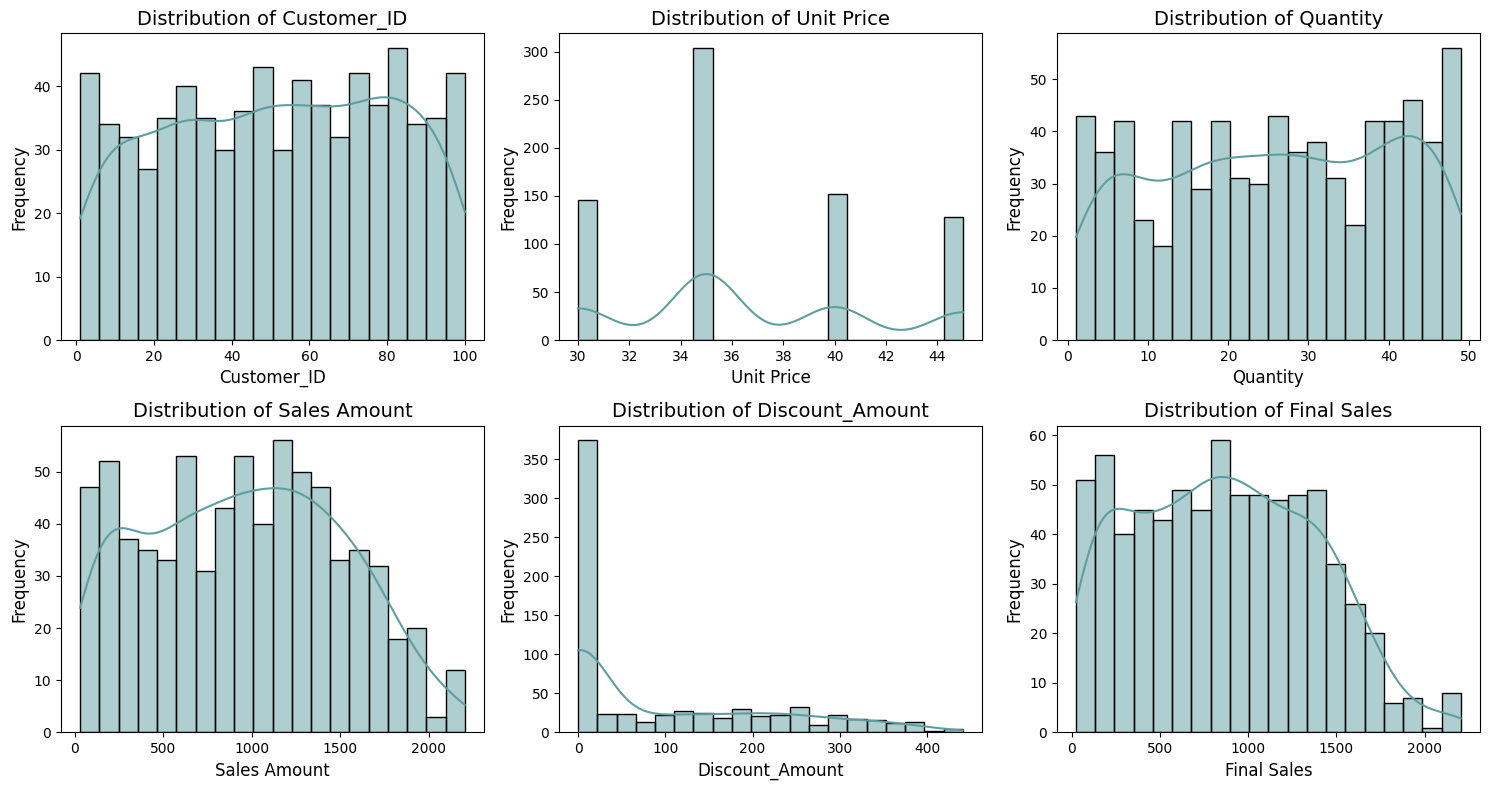

In [16]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

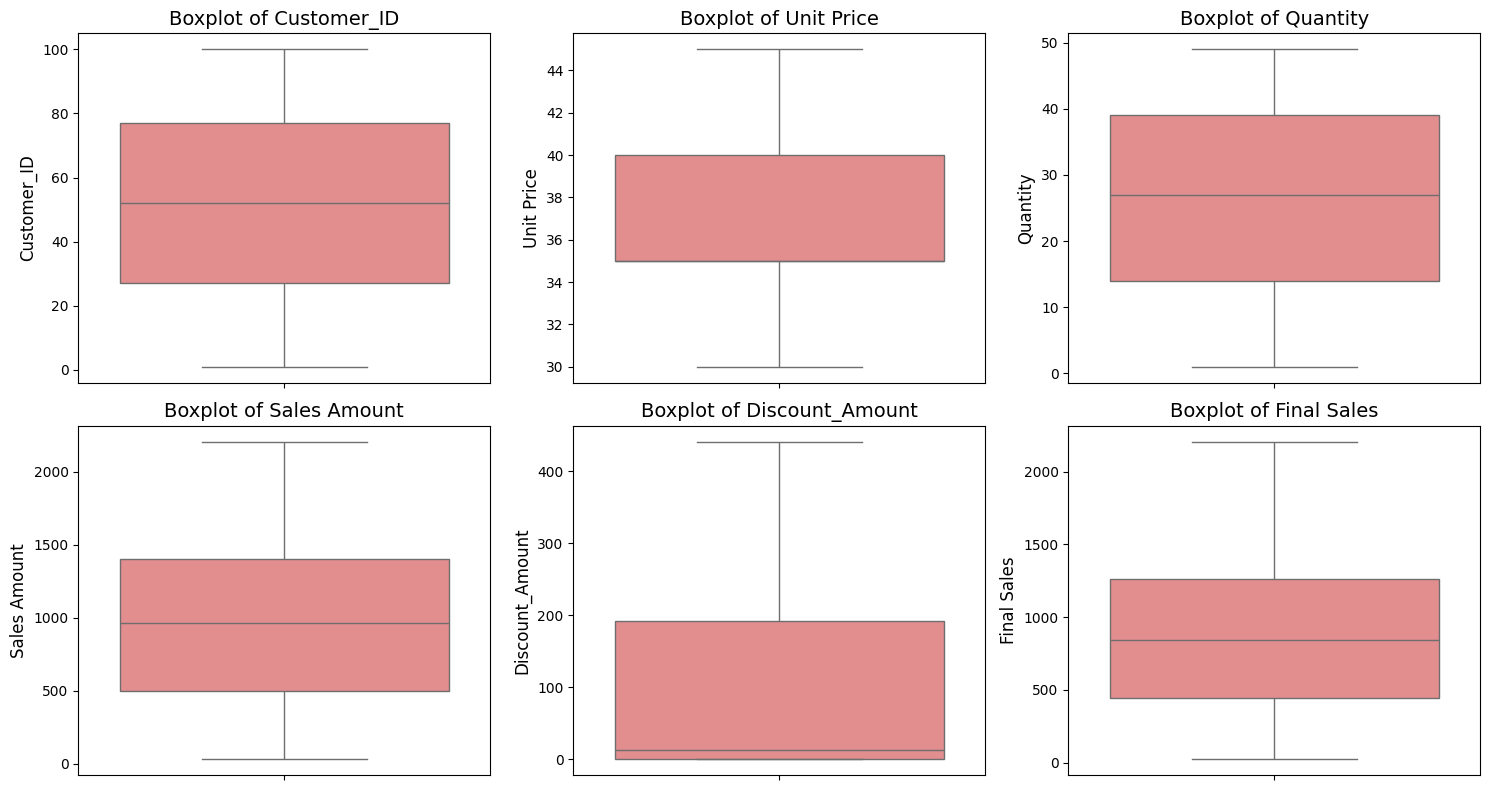

In [17]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

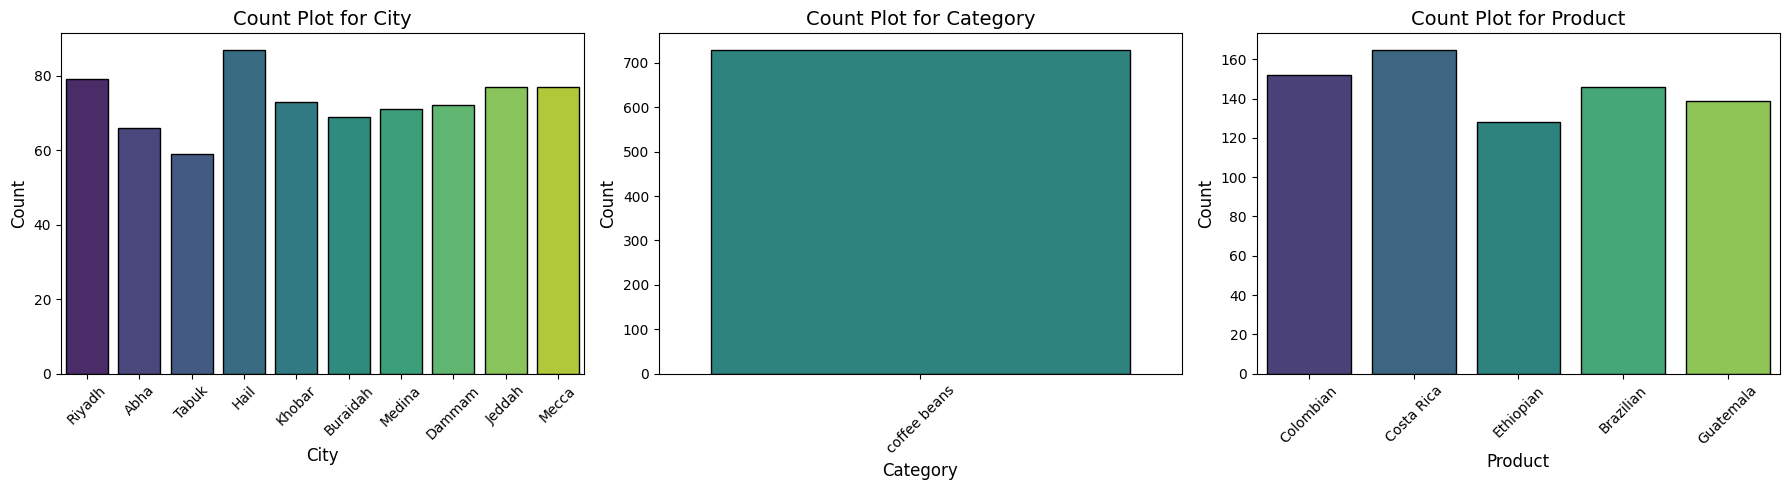

In [19]:
# Plotting each categorical column as a count plot

df.drop(columns=['Date'], inplace=True)

categorical_cols = df.select_dtypes(include=['object']).columns

num_cols = len(categorical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()  

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], palette="viridis", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].set_title(f"Count Plot for {col}", fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Data Preprocessing

In [23]:
# Dropping customer id column

df.drop(columns=['Customer_ID'], inplace=True)

In [25]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [26]:
X = df.drop(columns=['Final Sales'])
y = df['Final Sales']

In [27]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [28]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [29]:
Linear_reg = LinearRegression()
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()
Decision_tree = DecisionTreeRegressor()
Svr = SVR()
Knn = KNeighborsRegressor()

In [30]:
model_li = [Ride_reg, XGBoost, Random_forest, Ada_boost, Grad_boost, Bagging, Decision_tree, Svr, Knn]

Score = []
for model in model_li:
    model.fit(X_train, y_train)
    Score.append(r2_score(y_test, model.predict(X_test)))

Score

[0.9980905662085353,
 0.9996320605278015,
 0.9997350573417606,
 0.9809645326786992,
 0.9993288697710012,
 0.9996417815104962,
 0.9996612288897944,
 0.9550386550362371,
 0.9992216573945332]

## Model Evaluation

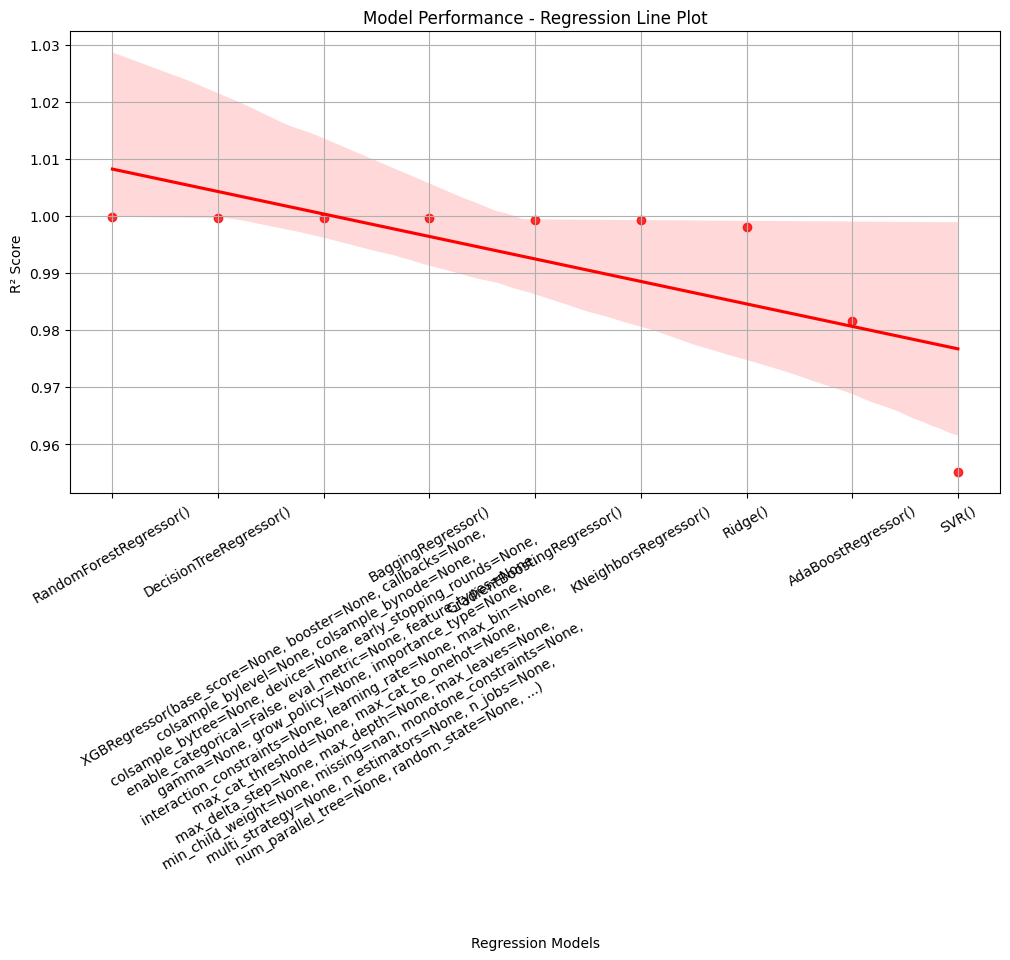

In [31]:
model_li = [Ride_reg, XGBoost, Random_forest, Ada_boost, Grad_boost, Bagging, Decision_tree, Svr, Knn]

Score = []
for model in model_li:
    model.fit(X_train, y_train)
    Score.append(r2_score(y_test, model.predict(X_test)))

df_scores = pd.DataFrame({'Model': model_li, 'R2 Score': Score})
df_scores = df_scores.sort_values(by='R2 Score', ascending=False)

# Regression line

plt.figure(figsize=(12, 6))
sns.regplot(x=list(range(len(df_scores))), y=df_scores['R2 Score'],
            scatter=True, marker="o", fit_reg=True, color="red")

plt.xticks(range(len(df_scores)), df_scores['Model'], rotation=30)
plt.xlabel("Regression Models")
plt.ylabel("R² Score")
plt.title("Model Performance - Regression Line Plot")
plt.grid(True)
plt.show()